In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from keras import backend as K 
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential
from keras.models import Model 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.applications import InceptionResNetV2 
! pip install split-folders
import glob
import split_folders


In [0]:
train_data_dir = "/content/drive/My Drive/Neural_ProjectC1/ECE542_sp20_CompetitionData/TrainData/"
test_data_dir = "/content/drive/My Drive/Neural_ProjectC1/ECE542_sp20_CompetitionData/TestData/"

def data_formatter(img_names, path):
  X = []
  for img_name in img_names:
    img = cv2.imread(path + img_name)
    img1= cv2.resize(img, (256,256))
    X.append(img1)
  X = np.array(X)
  return X

In [0]:


# num_train = 0
# num_val = 0

# num_train = len(glob.glob(train_data_dir + '/*.jpg'))
# num_val = len(glob.glob(val_data_dir + '/*.jpg'))

img_width, img_height, channels = 256, 256, 3
input_shape = (img_width, img_height, channels)


In [0]:
import keras
from keras.regularizers import l1

def get_model():
  model = Sequential()
  model.add(Conv2D(256, kernel_size=(3, 3), activity_regularizer=l1(0.01),
                  activation='relu',
                  input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(128,(3, 3), activation='relu', activity_regularizer=l1(0.01)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(64, activation='relu',kernel_regularizer=keras.regularizers.l2(l=0.01)))
  model.add(Dropout(0.2))
  model.add(Dense(5, activation='softmax'))
  sgd = keras.optimizers.SGD(lr = 10e-5)
  adam = keras.optimizers.Adam(lr=0.01, beta_1 = 0.9, beta_2 = 0.999, amsgrad=False)
  model.compile(loss = 'categorical_crossentropy',
                optimizer=adam,
                metrics=['accuracy'])
  return model


In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

def get_callbacks():

   path_checkpoint ='/content/drive/My Drive/Neural_ProjectC1/'  
   log_dir='/content/drive/My Drive/Neural_ProjectC1/keras_logs'
   
   callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                         monitor='val_loss',
                                         verbose=1,
                                         save_weights_only=False,
                                         save_best_only=True,
                                         mode='max',
                                         period=1)
   callback_early_stopping = EarlyStopping(monitor='val_loss',
                                           patience=5,
                                           verbose=1)
   callback_tensorboard = TensorBoard(log_dir=log_dir,
                                      histogram_freq=0,
                                      write_graph=False)
   callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                          factor=0.1,
                                          min_lr=1e-4,
                                          patience=3,
                                          verbose=1)

   callbacks = [callback_checkpoint, callback_tensorboard, callback_reduce_lr]

   return callbacks

In [0]:
import pandas as pd
import cv2
df = pd.read_csv('/content/drive/My Drive/Neural_ProjectC1/ECE542_sp20_CompetitionData/TrainAnnotations.csv')
grp = df.groupby('annotation')

df_grped = [grp.get_group(grp_X) for grp_X in grp.groups]

df_grped[0] = df_grped[0].sample(n = 150) 

df_train = pd.concat(df_grped)

print(df_train)

train_img_names = np.array(df_train['file_name'])
train_X = data_formatter(train_img_names, train_data_dir)
train_Y = keras.utils.to_categorical(np.array(df_train['annotation']), 5)


       file_name  annotation
237   005025.jpg           0
552   010717.jpg           0
828   015808.jpg           0
315   006316.jpg           0
242   005161.jpg           0
...          ...         ...
992   018807.jpg           4
995   018860.jpg           4
998   018884.jpg           4
1005  018968.jpg           4
1018  019121.jpg           4

[687 rows x 2 columns]


In [0]:
print(train_X.shape)
print(train_Y.shape)

(687, 256, 256, 3)
(687, 5)


In [0]:

batch_size = 64
epochs = 40
model = get_model()
history = model.fit(train_X, train_Y, epochs = epochs, validation_split = .2, shuffle= True)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 549 samples, validate on 138 samples
Epoch 1/40





549/549 [==============================] - 21s 37ms/step - loss: 2102414.5865 - acc: 0.2769 - val_loss: 284.7089 - val_acc: 0.0000e+00
Epoch 2/40
549/549 [==============================] - 5s 8ms/step - loss: 276.7564 - acc: 0.3370 - val_loss: 249.1971 - val_acc: 0.0000e+00
Epoch 3/40
549/549 [==============================] - 5s 8ms/step - loss: 216.1732 - acc: 0.3352 - val_loss: 183.2477 - val_acc: 0.0000e+00
Epoch 4/40
549/549 [==============================] - 5s 8ms/step - loss: 157.7636 - acc: 0.3224 - val_loss: 136.1633 - val_acc: 0.0000e+00
Epoch 5/40
549/549 [==============================] - 5s 8ms/step - loss: 117.8336 - acc: 0.3206 - val_loss: 104.5586 - val_acc: 0.0000e+00
Epoch 6/40
549/549 [====

In [0]:
model.save('/content/drive/My Drive/Neural_ProjectC1/' + "/data_aug.h5")

In [0]:
model = keras.models.load_model('/content/drive/My Drive/Neural_ProjectC1/' + "/data_aug.h5")

test_X=[]
test_arr=[]

test_data_dir = "/content/drive/My Drive/Neural_ProjectC1/ECE542_sp20_CompetitionData/TestData"
test_arr=glob.glob(test_data_dir + '/*.jpg')
print(test_arr)
#for file in glob.glob("/content/drive/My Drive/Neural_ProjectC1/ECE542_sp20_CompetitionData/TestData/*.jpg"):
  #test_arr.append(file.split('/')[-1])
#print (test_arr)
for image in test_arr:

    img = cv2.imread(image)
    img1= cv2.resize(img, (256,256))
    test_X.append(img1)

test_X = np.array(test_X)
print(test_X.shape)
#train_Y = data_formatter(test_arr, test_data_dir)
#print(train_Y.shape)




['/content/drive/My Drive/Neural_ProjectC1/ECE542_sp20_CompetitionData/TestData/21051.jpg', '/content/drive/My Drive/Neural_ProjectC1/ECE542_sp20_CompetitionData/TestData/21316.jpg', '/content/drive/My Drive/Neural_ProjectC1/ECE542_sp20_CompetitionData/TestData/20263.jpg', '/content/drive/My Drive/Neural_ProjectC1/ECE542_sp20_CompetitionData/TestData/20739.jpg', '/content/drive/My Drive/Neural_ProjectC1/ECE542_sp20_CompetitionData/TestData/24352.jpg', '/content/drive/My Drive/Neural_ProjectC1/ECE542_sp20_CompetitionData/TestData/22387.jpg', '/content/drive/My Drive/Neural_ProjectC1/ECE542_sp20_CompetitionData/TestData/21851.jpg', '/content/drive/My Drive/Neural_ProjectC1/ECE542_sp20_CompetitionData/TestData/21348.jpg', '/content/drive/My Drive/Neural_ProjectC1/ECE542_sp20_CompetitionData/TestData/22320.jpg', '/content/drive/My Drive/Neural_ProjectC1/ECE542_sp20_CompetitionData/TestData/22482.jpg', '/content/drive/My Drive/Neural_ProjectC1/ECE542_sp20_CompetitionData/TestData/21047.jpg'

In [0]:
test_y = model.predict_classes(test_X)
print(test_y)



[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [0]:
from keras.utils import to_categorical
#one-hot encode target column
test_X = to_categorical(test_X)
test_y = to_categorical(test_y)
test_y

Using TensorFlow backend.


NameError: ignored

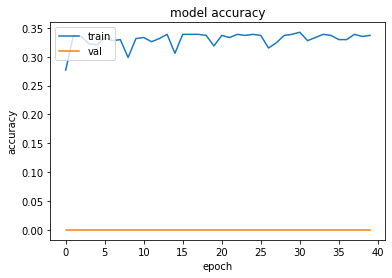

In [0]:
from matplotlib import pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()